In [127]:
import numpy as np
import pandas as pd
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [128]:
# generate expected y value based on useful attributes
# Y = XW + Bias
size = 200000 # number of data points
source_accs = []
target_accs = []
age_numbers = []
amounts = []
for i in range(size):
    source = float(randint(1000000, 9999999))
    source_accs.append(source)
    target = float(randint(1000000, 9999999))
    target_accs.append(target)
    age = float(randint(18,60))
    age_numbers.append(age)
    
mu, sigma = 0, 0.2 # mean and standard deviation for bias
bias = np.array(np.random.normal(mu, sigma, size)).reshape(size, 1) # Gaussian Distribution
print('the shape of bias is ', bias.shape)

source_accs = np.asarray(source_accs).reshape(size, 1)
target_accs = np.asarray(target_accs).reshape(size, 1)
age_numbers = np.asarray(age_numbers).reshape(size, 1)
# each row of X represents a transcation
# X = np.array([source_accs, target_accs, age_numbers])
X = np.concatenate((source_accs, target_accs, age_numbers), axis=1)
print('the shape of X is ', X.shape)
# weights, each element is a weight for corresponding feature in X
W = np.array([0.2, 0.25, 4]).reshape(3, 1)
print('the shape of W is ', W.shape)
# expected amounts for transcations
amounts = np.dot(X, W) + bias # dot product
print('the shape of amounts is ', amounts.shape)

the shape of bias is  (200000, 1)
the shape of X is  (200000, 3)
the shape of W is  (3, 1)
the shape of amounts is  (200000, 1)


***First Obstacle Add irrelevent feature***

In [129]:
# high_corr_feature
bonus_points = np.asarray(age+5*np.random.poisson(2,size)).reshape(size, 1)
X = np.concatenate((source_accs, target_accs, age_numbers, bonus_points), axis=1)
print('the shape of X after adding irerevlent feature is ', X.shape)

the shape of X after adding irerevlent feature is  (200000, 4)


In [130]:
# split training set and test set (0.8, 0.2)
x_train, x_test, y_train, y_test = train_test_split(X, amounts, train_size = 0.8)
print('x_train has shape ', x_train.shape)
print('y_train has shape ', y_train.shape)
print('x_test has shape ', x_test.shape)
print('y_test has shape ', y_test.shape)

x_train has shape  (160000, 4)
y_train has shape  (160000, 1)
x_test has shape  (40000, 4)
y_test has shape  (40000, 1)


In [131]:
# fit the model from training set
reg = LinearRegression().fit(x_train, y_train)
# predict on test set using the model
y_pred = reg.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction of linear regression is ', (1-error))

the accuracy from prediction of linear regression is  0.959851992662752


In [132]:
X = StandardScaler().fit_transform(X)
# now evalute after dimension reduction
pca = PCA(n_components=4)
# now fit the model and evalaute again
X_reduced = pca.fit_transform(X) # reduce-dim of input X
x_train, x_test, y_train, y_test = train_test_split(X_reduced, amounts, train_size = 0.8)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction after dimension reduction is ', (1-error))

the accuracy from prediction after dimension reduction is  0.95983813289919


In [133]:
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(x_train, y_train)
# # predict on test set using the model
# y_pred = clf.predict(x_test)
# # calculate error
# error = mean_squared_error(y_test, y_pred)
# print('the accuracy from prediction is ', (1-error))

In [134]:
clf = Lasso(alpha=0.1)
clf.fit(x_train, y_train)
# predict on test set using the model
y_pred = clf.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))

the accuracy from prediction is  0.9194521261034343


In [135]:
clf = Ridge(alpha=1.0)
clf.fit(x_train, y_train)
# predict on test set using the model
y_pred = clf.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))

the accuracy from prediction is  -25.86871254384982


***Second Obstacle***
* **Make outliers**
* **Run the algorithm, expect to see strange accuracy**

In [136]:
for i in range(10):
    rand_idx = randint(0, size)
    amounts[rand_idx] += randint(1000000, 9999999)

In [137]:
# split training set and test set (0.8, 0.2)
x_train, x_test, y_train, y_test = train_test_split(X, amounts, train_size = 0.8)
# fit the model from training set
reg = LinearRegression().fit(x_train, y_train)
# predict on test set using the model
y_pred = reg.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))

the accuracy from prediction is  -36512776.05542175


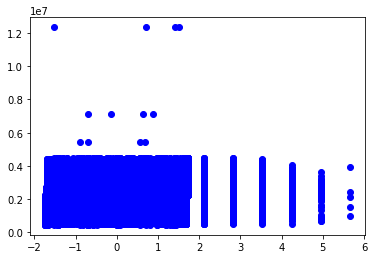

In [138]:
# scatter plot to observe the pattern and see if there are outliers
plt.plot(X, amounts, 'o', color='blue')

In [139]:
# identify outliers by using Interquartile range (IQR)
sorted_amounts = sorted(amounts)
half = int(size/2)
# First quartile (Q1)
Q1 = np.median(sorted_amounts[:half])
Q3 = np.median(sorted_amounts[half:])
# Interquaritle range (IQR)
IQR = Q3 - Q1

In [140]:
outliers_row = []
# remove outliers from X and amounts, adjust the size of bias accordingly
threhold = Q3 + 0.8*IQR # lower the coefficient of IQR if do not remove outliers completely
for i in range(size):
    if amounts[i] > threhold:
        outliers_row.append(i)
        
X = np.delete(X, outliers_row, 0)
amounts = np.delete(amounts, outliers_row, 0)
bias = np.delete(bias, outliers_row, 0)

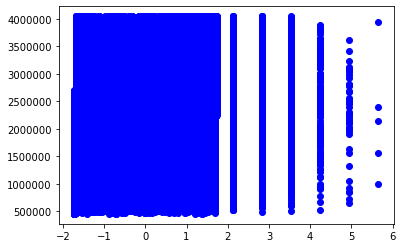

In [141]:
# re-scatter plot to see if we eliminate the outliers
plt.plot(X, amounts, 'o', color='blue')

In [142]:
# split training set and test set (0.8, 0.2)
x_train, x_test, y_train, y_test = train_test_split(X, amounts, train_size = 0.8)
# fit the model from training set
reg = LinearRegression().fit(x_train, y_train)
# predict on test set using the model
y_pred = reg.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))

the accuracy from prediction is  -10157.771591996381


 ***Third Obstacle***
 * **Make input matrix X have missing values**
 * **Then run the alorithm, expect to see the algorithm fail to run**

In [143]:
# make input matrix X have missing values
for i in range(200):
    idx_x = np.random.randint(0, X.shape[0])
    idx_y = np.random.randint(0, X.shape[1])
    X[idx_x][idx_y] = np.nan

In [144]:
# split training set and test set (0.8, 0.2)
x_train, x_test, y_train, y_test = train_test_split(X, amounts, train_size = 0.8)
print('x_train has shape ', x_train.shape)
print('y_train has shape ', y_train.shape)
print('x_test has shape ', x_test.shape)
print('y_test has shape ', y_test.shape)

x_train has shape  (155954, 4)
y_train has shape  (155954, 1)
x_test has shape  (38989, 4)
y_test has shape  (38989, 1)


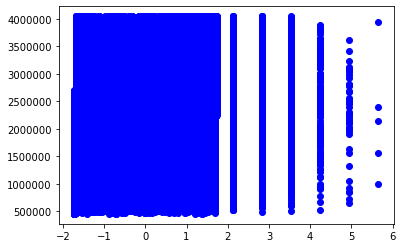

In [145]:
plt.plot(X, amounts, 'o', color='blue')

**Now we expecte to see linear regression algorithm fails due to invalid entries in input**

In [146]:
# fit the model from training set
reg = LinearRegression().fit(x_train, y_train)
# predict on test set using the model
y_pred = reg.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

* **Then we try to recover missing values in X**
* **Each column is a feature of X**
* **For each NaN, we regenerate a reasonable value that lies in minimum and maximum of that column**
* **After we replace NaN with reasonable values in X, we recompute amounts (y values)**

In [ ]:
for j in range(X.shape[1]):
    min_val = np.nanmin(X[:,j])
    max_val = np.nanmax(X[:,j])
    for i in range(X.shape[0]):
        if np.isnan(X[i][j]):
            counter += 1
            X[i][j] = float(randint(min_val, max_val))

amounts = np.dot(X, W) + bias # dot product

**After the recovery step, we expect to see a reasonable prediction accuracy**

In [ ]:
# split training set and test set (0.8, 0.2)
x_train, x_test, y_train, y_test = train_test_split(X, amounts, train_size = 0.8)
print('x_train has shape ', x_train.shape)
print('y_train has shape ', y_train.shape)
print('x_test has shape ', x_test.shape)
print('y_test has shape ', y_test.shape)

# fit the model from training set
reg = LinearRegression().fit(x_train, y_train)
# predict on test set using the model
y_pred = reg.predict(x_test)
# calculate error
error = mean_squared_error(y_test, y_pred)
print('the accuracy from prediction is ', (1-error))